In [1]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np
import glob # folder directory
from PIL import Image # Image
import os # file directory

import matplotlib.pyplot as plt
from matplotlib import gridspec

from scipy.optimize import NonlinearConstraint

In [2]:
def target(x):
    return -(x**2/4000-np.cos(x) + 1)

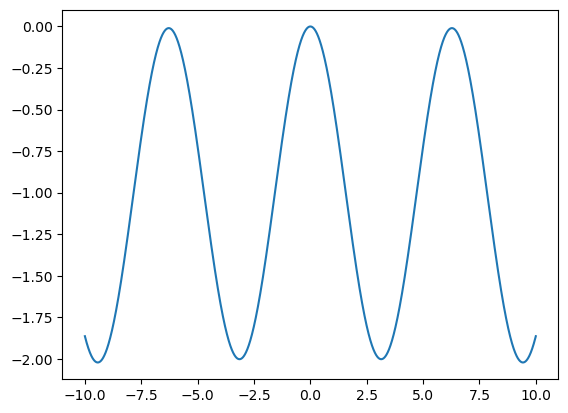

In [3]:
x = np.linspace(-10, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

In [4]:
optimizer = BayesianOptimization(target, {'x': (-10, 10)}, random_state=27)

In [5]:
optimizer.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
| 1         | -0.9154   | -1.486    |
| 2         | -0.009932 | 6.292     |


In [6]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-10, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='black')
    acq.plot(x[np.argmax(utility)], np.max(utility), '8', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='green', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((-2, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

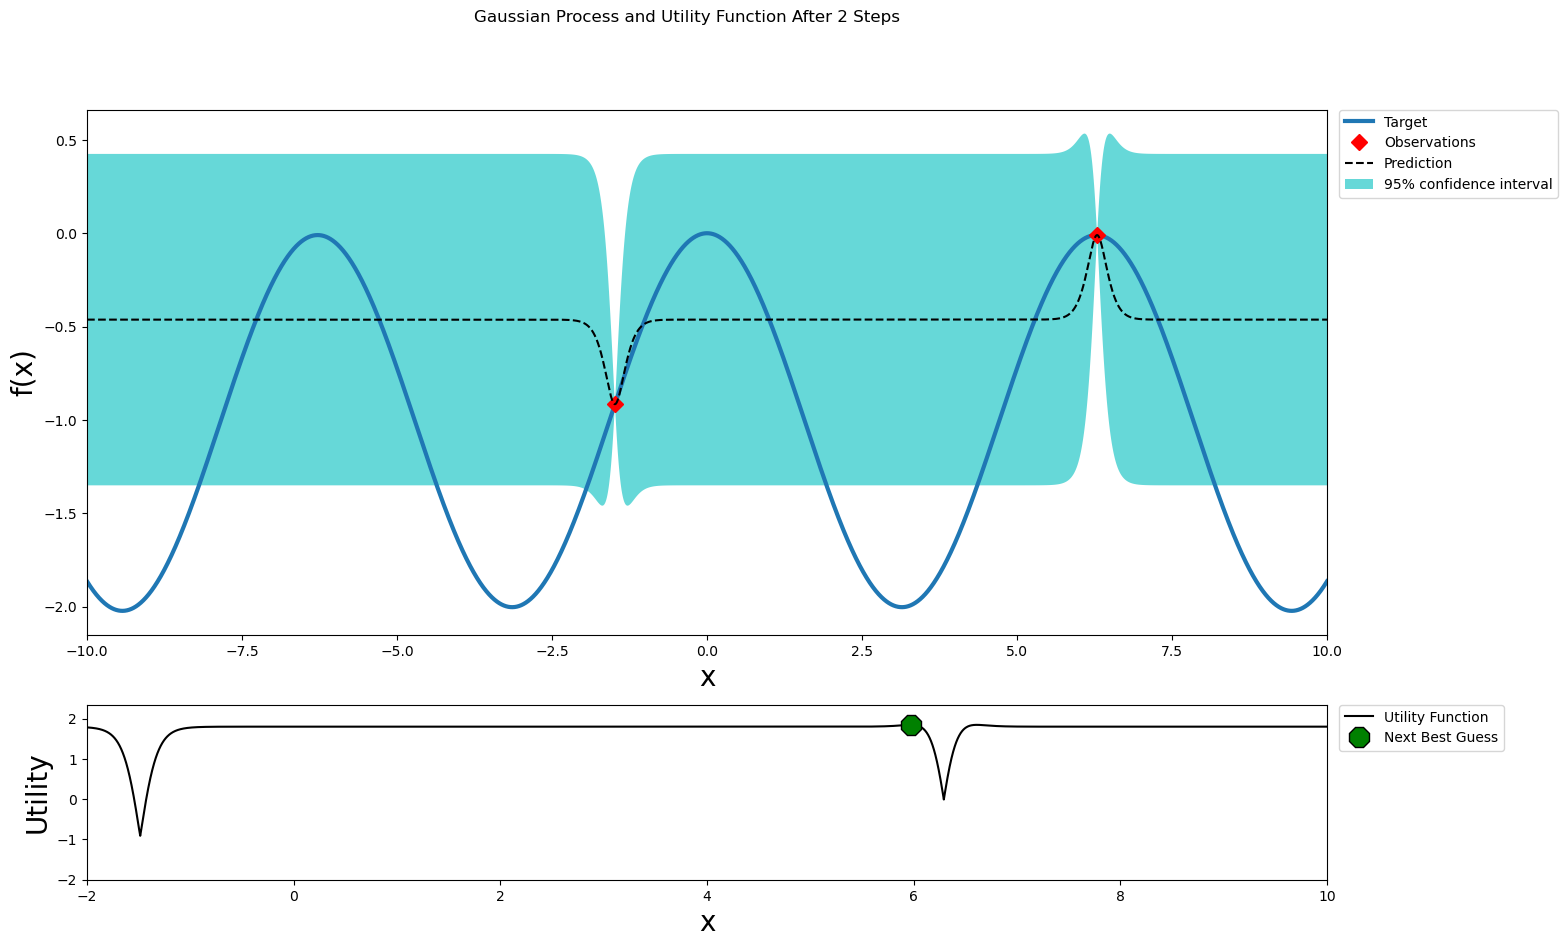

In [7]:
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 3         | -1.433    | -8.282    |
| 4         | -1.864    | 10.0      |
| 5         | -0.009994 | 6.296     |
| 6         | -1.897    | 2.68      |
| 7         | -1.15     | -4.567    |
| 8         | -1.864    | -10.0     |
| 9         | -0.06282  | 0.3562    |
| 10        | -1.148    | 7.987     |
| 11        | -0.01532  | -6.385    |
| 12        | -1.042    | 4.676     |
| 13        | -1.989    | -2.981    |
| 14        | -0.09857  | -0.4476   |
| 15        | -0.1998   | -5.653    |
| 16        | -0.6616   | 1.225     |
| 17        | -0.3198   | -7.089    |
| 18        | -0.187    | 5.676     |
| 19        | -0.2067   | 6.918     |
| 20        | -0.000668 | -0.03655  |
| 21        | -0.02712  | -6.094    |
| 22        | -0.02942  | 6.082     |


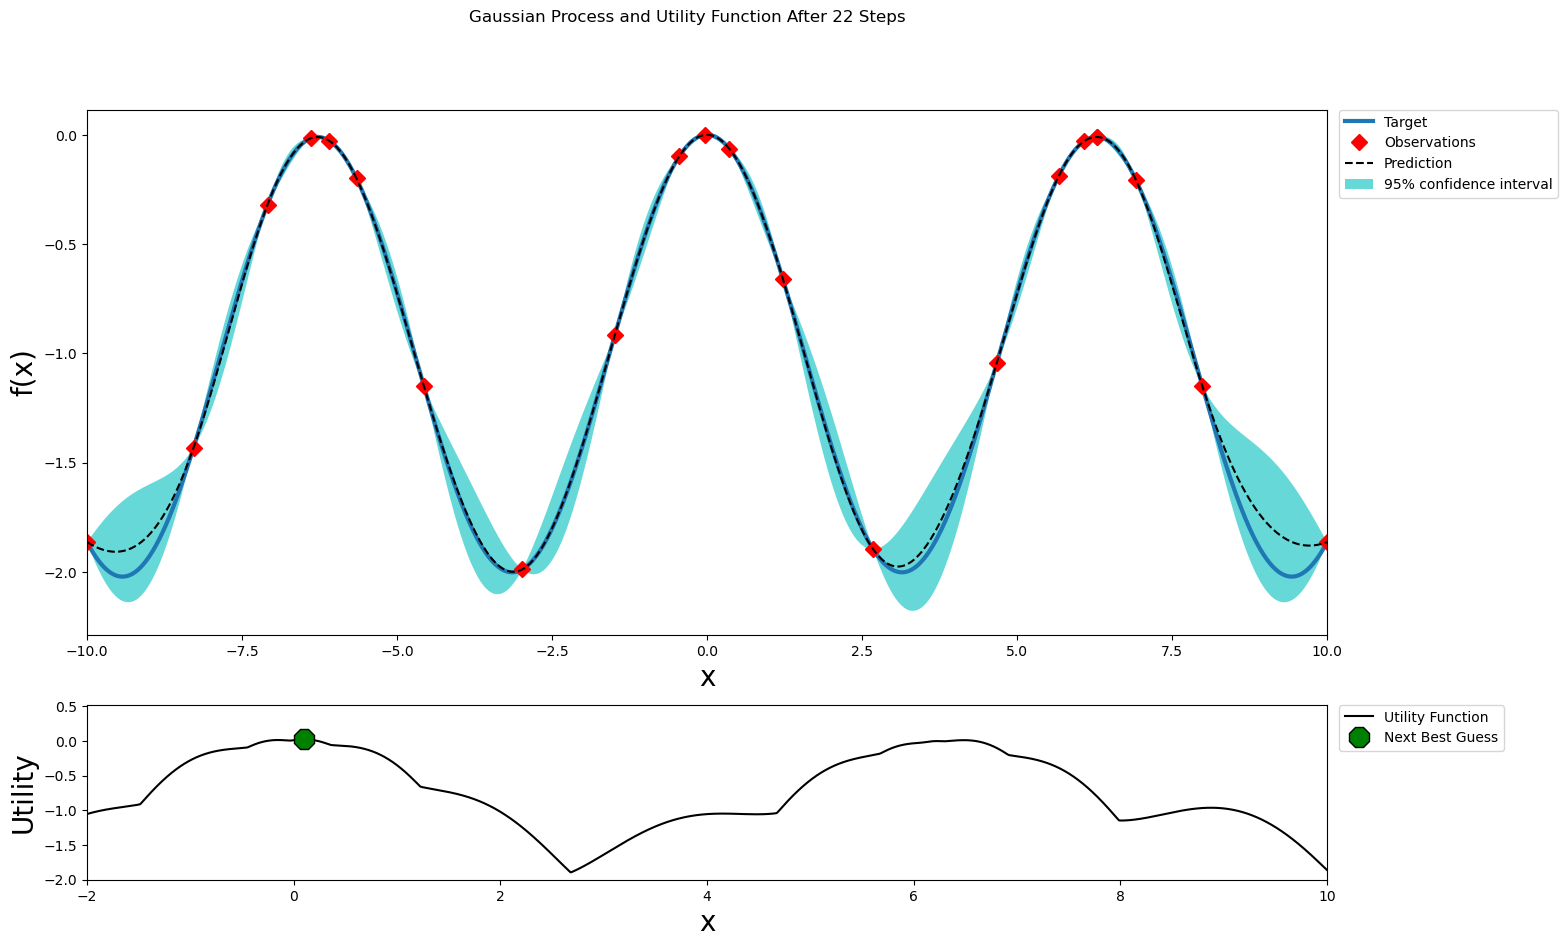

In [8]:
optimizer.maximize(init_points=0, n_iter=20, kappa=5)
plot_gp(optimizer, x, y)

In [36]:
# Taking all CSV files downloaded
path = '/Users/daniellilla/Desktop/Optimisation_Classes/plots'
extension = 'png'
os.chdir(path)
all_bay_plots = glob.glob('*.{}'.format(extension))

fp_out = '/Users/daniellilla/Desktop/Optimisation_Classes/Bayesian_plot.gif'

imgs = (Image.open(picture) for picture in sorted(all_bay_plots))
img = next(imgs)  # extract first image from iterator
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)